In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [17]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

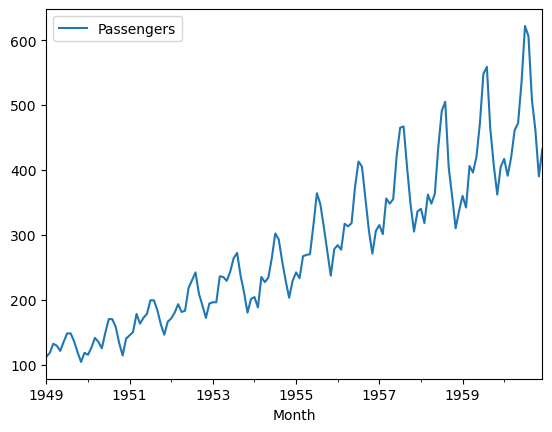

In [18]:
df.plot();

In [5]:
adfuller(df['Passengers'])


(0.8153688792060371,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [20]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060371
P-Value: 0.9918802434376408
Non-Stationary


In [21]:
adf(np.random.randn(100))


Test-Statistic: -4.432685285141661
P-Value: 0.00025969683870987555
Stationary


In [22]:
df['LogPassengers'] = np.log(df['Passengers'])

In [23]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069674
P-Value: 0.422366774770388
Non-Stationary


In [24]:
df['Diff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

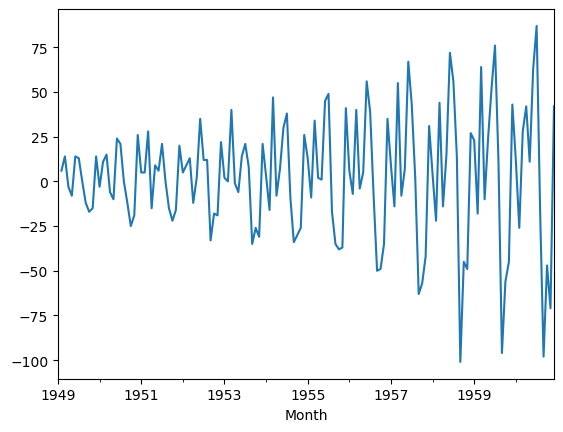

In [25]:
df['Diff'].plot()

In [26]:
adf(df['Diff'].dropna())

Test-Statistic: -2.829266824169981
P-Value: 0.05421329028382792
Non-Stationary


In [27]:
df['DiffLog'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

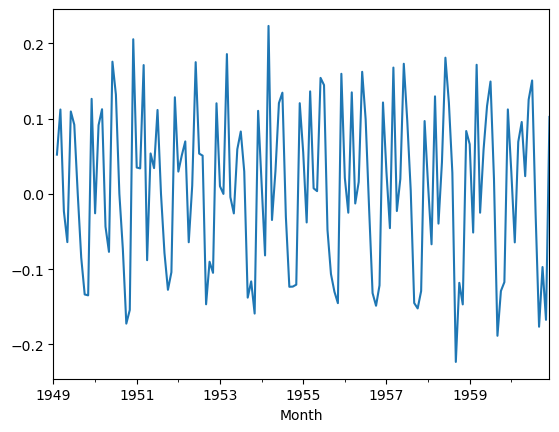

In [28]:
df['DiffLog'].plot()

In [29]:
adf(df['DiffLog'].dropna())

Test-Statistic: -2.7171305983881355
P-Value: 0.07112054815085829
Non-Stationary


In [30]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [31]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [32]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

In [33]:
goog['LogPrice'] = np.log(goog['Close'])

In [34]:
goog['LogRet'] = goog['LogPrice'].diff()

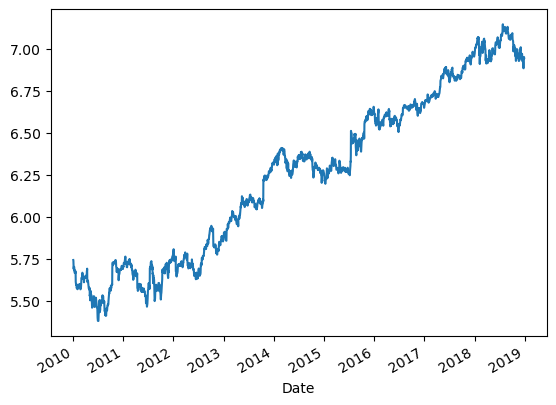

In [35]:
goog['LogPrice'].plot();

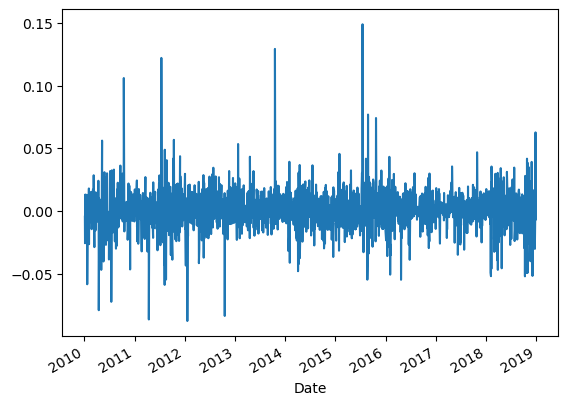

In [36]:
goog['LogRet'].plot();

In [37]:
adf(goog['LogPrice'])

Test-Statistic: -0.41819025789061176
P-Value: 0.907017067749841
Non-Stationary


In [38]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.66748022773677
P-Value: 0.0
Stationary


In [26]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

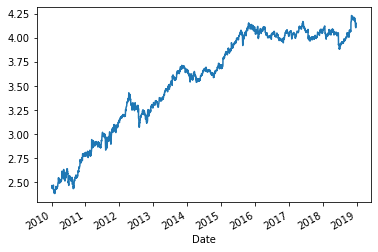

In [27]:
sbux['LogPrice'].plot();

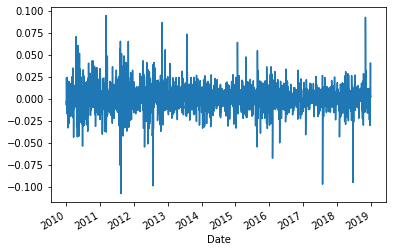

In [28]:
sbux['LogRet'].plot();

In [29]:
adf(sbux['LogPrice'])

Test-Statistic: -1.902013358389997
P-Value: 0.3311145569853776
Non-Stationary


In [30]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426958097
P-Value: 0.0
Stationary
